## 1. Import libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Read data

In [7]:
df_raw = pd.read_csv('./datasets/ChargingRecords_Updated.csv')
df_trans = pd.read_csv('./datasets/ChargingRecords_Updated_transactions.csv')

FileNotFoundError: [Errno 2] No such file or directory: './datasets/ChargingRecords_Updated_transactions.csv'

Also, we need to convert all 'data' columns to datetime Pandas format:

In [ ]:
print(df_raw.columns)
print(df_trans.columns)

In [ ]:
df_raw['start_day'] = pd.to_datetime(df_raw['start_day'], format = "%Y/%m/%d")
df_raw['end_day'] = pd.to_datetime(df_raw['end_day'], format = "%Y/%m/%d")
df_raw['start_time'] = pd.to_datetime(df_raw['start_time'], format = "%H:%M:%S").dt.time
df_raw['end_time'] = pd.to_datetime(df_raw['end_time'], format = "%H:%M:%S").dt.time
df_trans['Started'] = pd.to_datetime(df_trans['Started'], format = "%d/%m/%Y %H:%M:%S")


After that, we can look and check our different dataframes:

In [ ]:
print(df_raw.head())
print(df_trans.head())

In [ ]:
df_raw['Location'].unique()

## 3. Visualize data

One of the biggest parts of the notebook. Here we can look through some variables and see some dependencies. Firstly, let's check the dependency from the date:

In [ ]:
def grouped(df, key, freq, col):
    """GROUP AND COUNT DATA WITH CERTAIN FREQUENCY"""
    df_grouped = df.groupby([pd.Grouper(key=key, freq=freq)]).agg(mean = (col, 'mean'), count = (col, 'count'))
    df_grouped = df_grouped.reset_index()
    return df_grouped


In [ ]:
df_grouped_start_d = grouped(df_trans, 'Started', 'm', 'TotalEnergy')
df_grouped_start_d

NameError: name 'df_grouped_start_d' is not defined

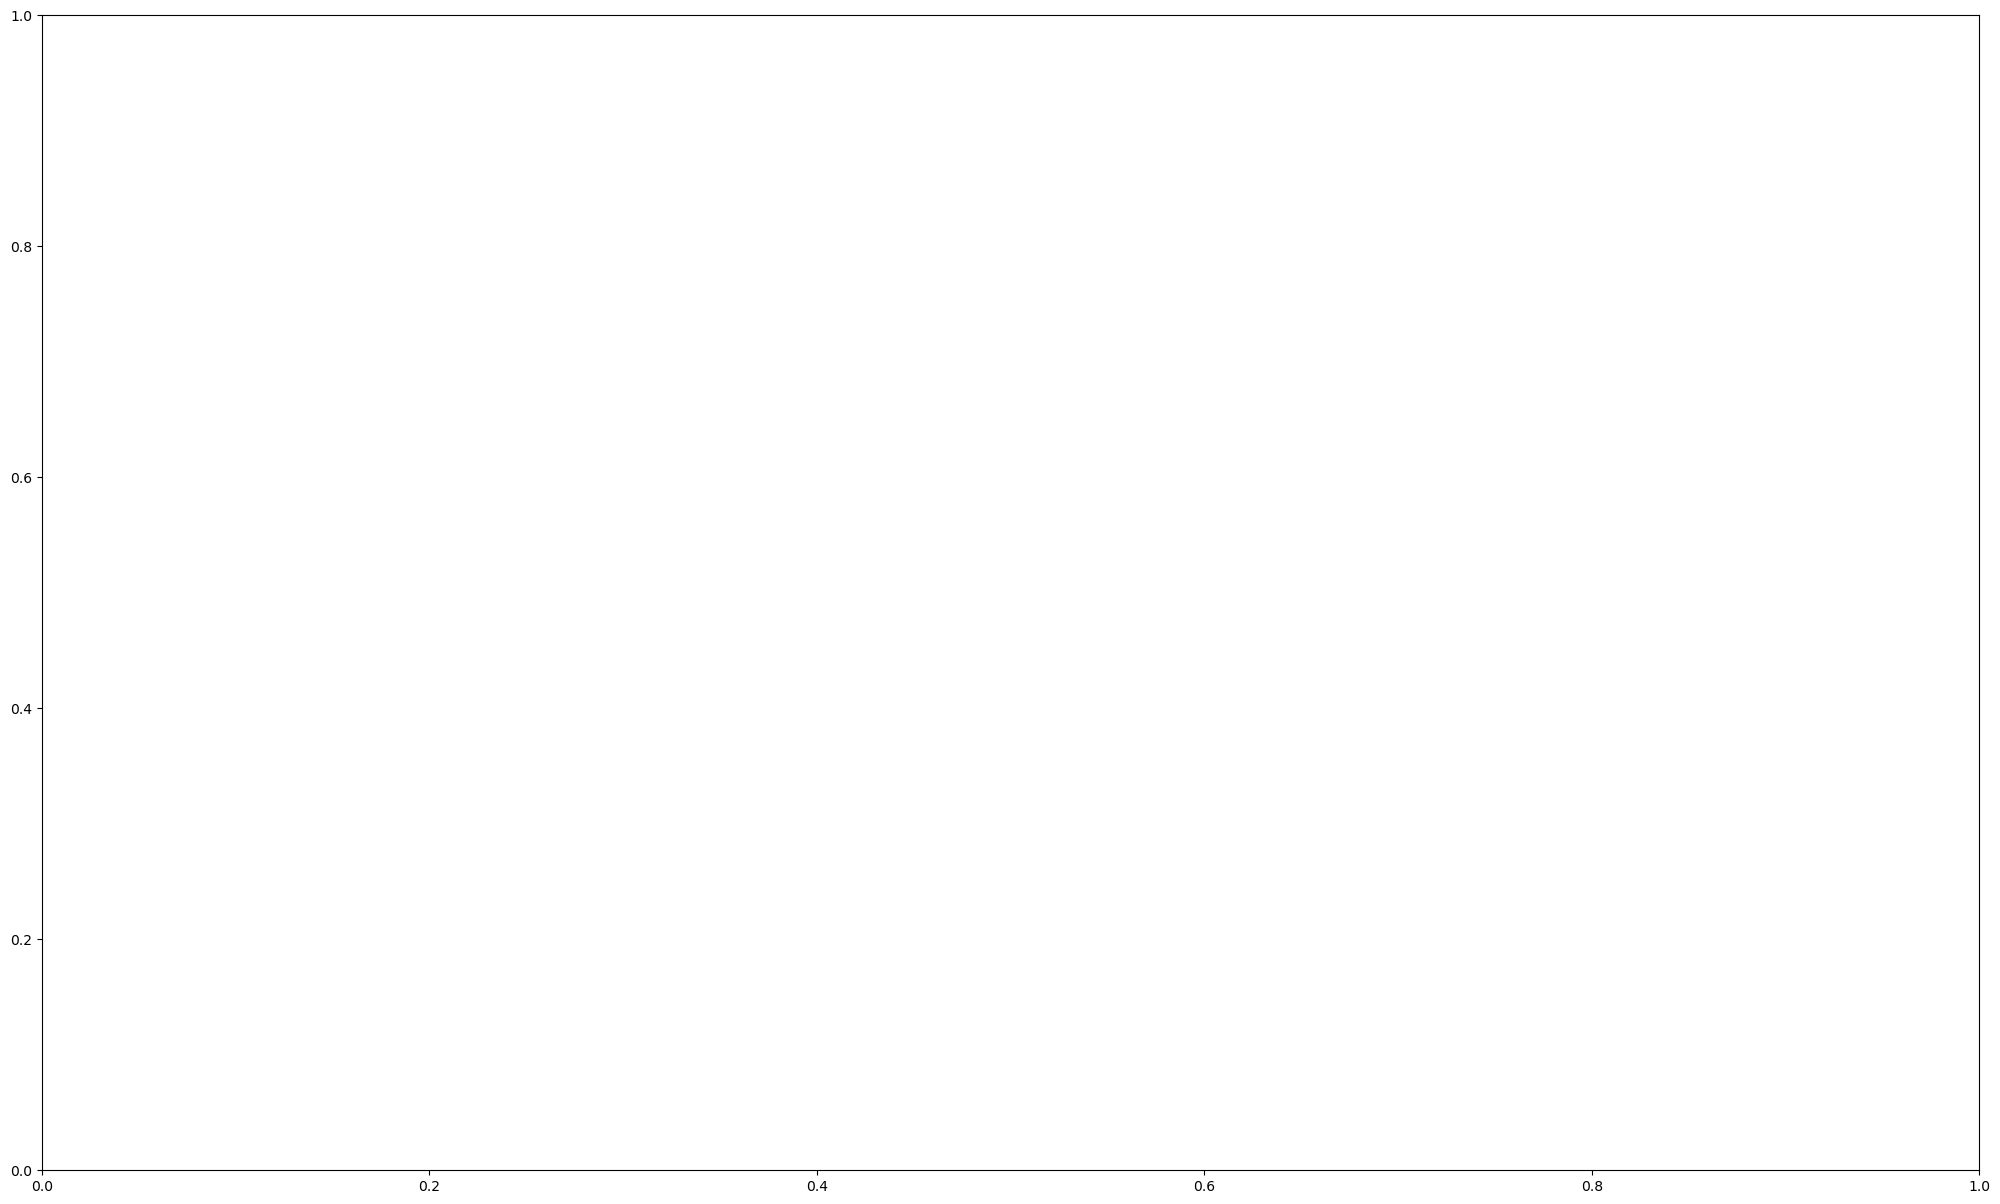

In [ ]:
fig, axes = plt.subplots(1, 1, figsize = (25,15))
df_grouped_start_d.plot.bar(x='Started', y='count', color='b', title='count', ax=axes, rot=0)
plt.show()

In [ ]:
Mon_clust = pd.read_csv('res/preprocess/session_cluster/Monthly_clustered_2022_trans_data.csv')
print(Mon_clust.columns)
print(np.unique(Mon_clust['Clusters']))
clust0 = Mon_clust[Mon_clust['Clusters'] == 0].shape[0]
clust1 = Mon_clust[Mon_clust['Clusters'] == 1].shape[0]
clust2 = Mon_clust[Mon_clust['Clusters'] == 2].shape[0]
print(clust0)
print(clust1)
print(clust2)



In [ ]:
Year_clust = pd.read_csv('res/preprocess/session_cluster/Final_session_clustered_2022_trans_data.csv')
print(Year_clust.columns)
print(np.unique(Year_clust['Final_clusters']))
print(Mon_clust.columns)
clust0 = Mon_clust[Mon_clust['Final_clusters'] == 0].shape[0]
clust1 = Mon_clust[Mon_clust['Final_clusters'] == 1].shape[0]
clust2 = Mon_clust[Mon_clust['Final_clusters'] == 2].shape[0]
print(clust0)
print(clust1)
print(clust2)

